<a href="https://colab.research.google.com/github/himashi27/Design-and-Analysis-of-Algorithms-Lab-assignment/blob/ass.4/coa_ass_four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NP-Hard Nature of Airline Crew Scheduling

Airline Crew Scheduling belongs to a family of classic NP-hard scheduling and resource allocation problems.
In this problem, each flight must be assigned to a crew member while satisfying:

No overlapping flights
Mandatory rest time between two flights
Optional fairness or cost optimization

The difficulty arises because:
Every flight can be assigned to any crew member → combinatorial explosion
Constraints restrict valid combinations → complex feasibility checking
Dependencies between flights create a constraint satisfaction chain

This makes it comparable to known NP-hard problems like:
Job Scheduling
Graph Coloring

Assignment Problems with Constraints

Set Partitioning

Since there is no polynomial-time algorithm known to solve all general cases optimally, the problem is NP-hard.


In [2]:
!pip install memory_profiler


Recursive Calls: 5
Assignment:  {'C1': [('F1', 9, 11), ('F3', 13, 15)], 'C2': [('F2', 10, 12)], 'C3': [('F4', 11, 13)]}


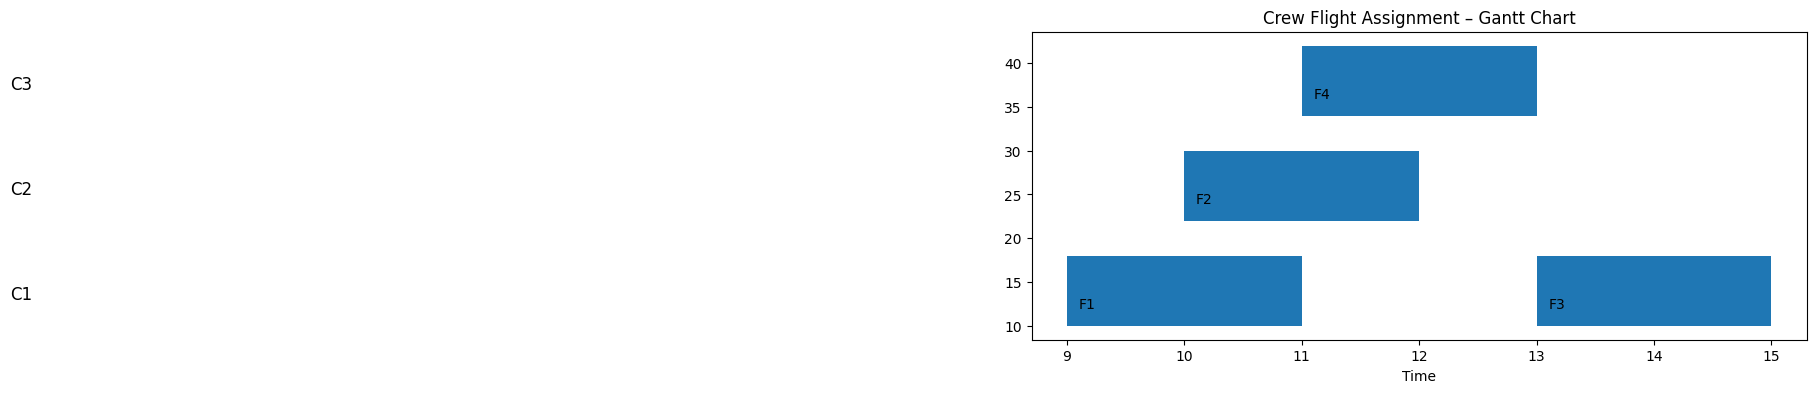

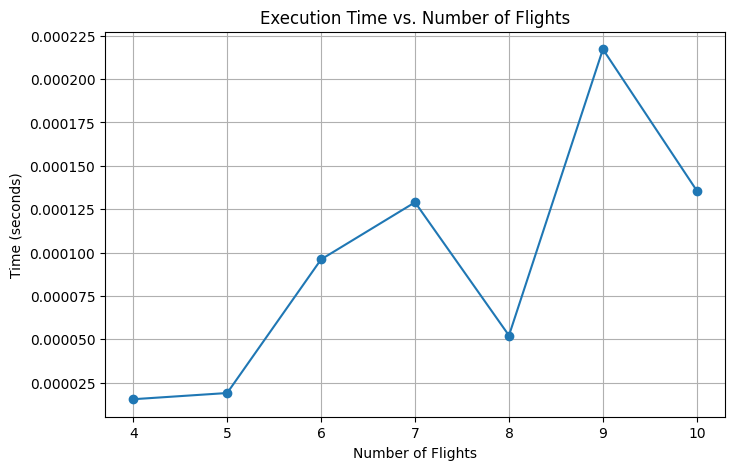

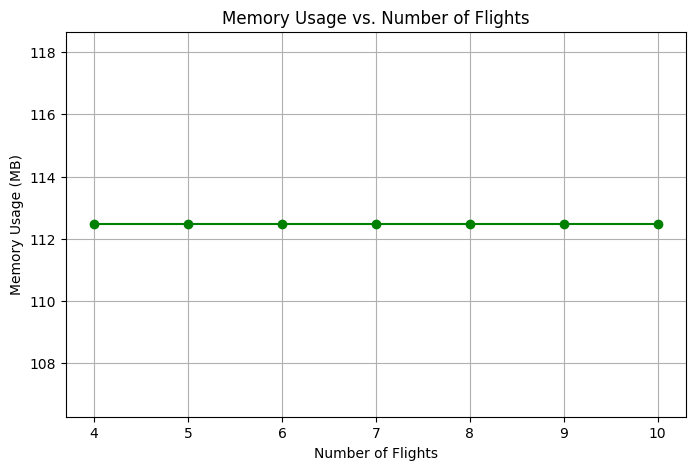

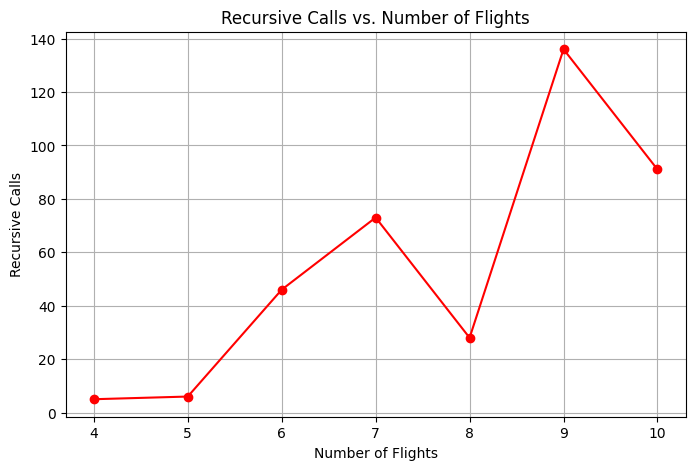

In [3]:
# ===============================================================
# AIRLINE CREW SCHEDULING – BACKTRACKING (FULL VERSION)
# With: Time Profiling, Memory Profiling, Gantt Chart, Recursion Count
# ===============================================================

import time
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
import random

# -------------------------------------------------------
# 1. CONSTRAINT CHECKER
# -------------------------------------------------------

def is_valid_assignment(flight, assigned_flights, rest_time=1):
    f_id, start, end = flight
    for _, s, e in assigned_flights:
        if not (end + rest_time <= s or start >= e + rest_time):
            return False
    return True


# -------------------------------------------------------
# 2. BACKTRACKING ALGO (with recursion count)
# -------------------------------------------------------

recursive_calls = 0

def backtrack_assignments(flights, crew, index, assignment):
    global recursive_calls
    recursive_calls += 1

    if index == len(flights):
        return True

    flight = flights[index]

    for member in crew:
        if is_valid_assignment(flight, assignment[member]):

            assignment[member].append(flight)

            if backtrack_assignments(flights, crew, index + 1, assignment):
                return True

            assignment[member].pop()

    return False


# -------------------------------------------------------
# 3. DRIVER FUNCTION
# -------------------------------------------------------

def schedule_flights(flights, crew_members):
    global recursive_calls
    recursive_calls = 0

    assignment = {c: [] for c in crew_members}

    success = backtrack_assignments(flights, crew_members, 0, assignment)

    if success:
        return assignment, recursive_calls
    else:
        return None, recursive_calls


# -------------------------------------------------------
# 4. SAMPLE FLIGHTS
# -------------------------------------------------------

flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 11, 13)
]

crew_members = ['C1', 'C2', 'C3']


# -------------------------------------------------------
# 5. RUN SCHEDULING
# -------------------------------------------------------

result, calls = schedule_flights(flights, crew_members)

print("Recursive Calls:", calls)
print("Assignment: ", result)


# -------------------------------------------------------
# 6. GANTT CHART
# -------------------------------------------------------

def plot_gantt(assignment):
    if assignment is None:
        print("No valid assignment.")
        return

    fig, ax = plt.subplots(figsize=(10, 4))

    y = 10
    height = 8

    for member, fls in assignment.items():
        for f_id, s, e in fls:
            ax.broken_barh([(s, e - s)], (y, height))
            ax.text(s + 0.1, y + 2, f_id)
        ax.text(0, y + 3, member, fontsize=12)
        y += 12

    ax.set_xlabel("Time")
    ax.set_title("Crew Flight Assignment – Gantt Chart")
    plt.show()

plot_gantt(result)


# -------------------------------------------------------
# 7. PERFORMANCE PROFILING (Time + Memory)
# -------------------------------------------------------

def generate_random_flights(n):
    flights = []
    for i in range(n):
        s = random.randint(8, 14)
        e = s + random.randint(1, 3)
        flights.append((f"F{i+1}", s, e))
    return flights


flight_sizes = list(range(4, 11))
times = []
memories = []
rec_calls = []

for n in flight_sizes:
    test_flights = generate_random_flights(n)

    # Time measurement
    t_start = time.time()
    result, calls = schedule_flights(test_flights, crew_members)
    t_end = time.time()
    times.append(t_end - t_start)

    # Memory measurement
    mem_used = memory_usage((schedule_flights, (test_flights, crew_members)), max_iterations=1)
    memories.append(max(mem_used))

    # Recursion count
    rec_calls.append(calls)


# -------------------------------------------------------
# 8. PERFORMANCE PLOTS
# -------------------------------------------------------

plt.figure(figsize=(8,5))
plt.plot(flight_sizes, times, marker='o')
plt.xlabel("Number of Flights")
plt.ylabel("Time (seconds)")
plt.title("Execution Time vs. Number of Flights")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(flight_sizes, memories, marker='o', color='green')
plt.xlabel("Number of Flights")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage vs. Number of Flights")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(flight_sizes, rec_calls, marker='o', color='red')
plt.xlabel("Number of Flights")
plt.ylabel("Recursive Calls")
plt.title("Recursive Calls vs. Number of Flights")
plt.grid(True)
plt.show()


Why Brute-Force and Backtracking Only Work for Small n
1. Brute-force:

Brute-force tries every possible assignment of flights to crew members.
| Flights (n) | Crew (k=3) | Possible Assignments |
| ----------- | ---------- | -------------------- |
| 5           | 3          | 243                  |
| 10          | 3          | 59,049               |
| 15          | 3          | 14,348,907           |
| 20          | 3          | 3.4 billion (!)      |
Hence brute-force becomes infeasible beyond 10–12 flights.

2. Backtracking:

Backtracking prunes invalid assignments but still suffers from:

High branching factor (each flight → k choices)
Deep recursion of size n
Constraint checks at each level
Worst-case performance is still exponential because in the worst case almost all combinations must still be explored before finding a valid schedule or concluding none exists.

Thus, backtracking is practical only for:
Small number of flights (4–10)
Small crew size
Tight constraints that prune early
Real airline schedules (hundreds of flights per day) cannot be solved using plain backtracking.

Time Complexity: Why O(k × 2ⁿ)?

The time complexity for simplified airline crew assignment is:

𝑂
(
𝑘
×
2ⁿ
)


Where:

n = number of flights

k = number of crew members

🔍 Why 2ⁿ?

Each flight has two choices: either assigned or not assigned at a certain branch.
With constraints, pruning reduces the search, but in the worst case:

Backtracking explores subsets of flights
⇒
2ⁿ combinations
Backtracking explores subsets of flights⇒2ⁿ  combinations

🔍 Why multiply by k?
For each valid subset, we try assigning it to one of the k crew members.

Thus:
Exponential in flights
Linear in crew size

Real-World Improvements
Since brute-force/backtracking can't scale, real airline scheduling uses advanced optimization techniques:

1. Heuristics
Better ordering and pruning such as:
Most Constrained Flight First (MCF): Assign flights with maximum conflicts first
Greedy assignment based on availability
Sorting flights by start times
Using earliest finishing time first
Heuristics improve performance dramatically but do not always guarantee optimal solutions.

2. Integer Linear Programming (ILP)
Model the entire problem mathematically:
Binary decision variables for assigning flight → cre
Objective: cost minimization or fairness
Constraints: rest times, no overlaps
Solvers like:
Gurobi
CPLEX
OR-Tools (MIP solver)
find high-quality solutions efficiently.

3. Constraint Programming (CP-SAT Solver)
Ideal for scheduling problems with many constraints.
Google OR-Tools' CP-SAT solver handles:
Time windows
Logical constraints
Resource availability
Much faster than brute-force or custom backtracking.

4. Metaheuristics
Used in real airline optimization systems:
Genetic Algorithms
Simulated Annealing
Tabu Search
Ant Colony Optimization
These find near-optimal solutions with excellent scalability.

5. Decomposition Techniques
Splitting the problem into manageable subproblems:
Crew pairing
Crew rostering
Duty assignment
Each subproblem is solved separately using efficient optimization models.

Final Summary (Short Version for Report)

Airline crew scheduling is NP-hard due to combinatorial explosion and
multiple interdependent constraints.

Brute-force and backtracking only work for small datasets (≤10 flights) because the search space grows exponentially.

Worst-case time complexity is O(k × 2ⁿ), making scaling extremely difficult.

Real airline systems use heuristics, ILP, CP-SAT solvers, and metaheuristics to achieve feasible solutions for large real-world datasets.